In [1]:
%matplotlib inline

In [2]:
#Importing the relevant dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [3]:
#Importing the Models with which the data is going to be fitted
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

In [4]:
#Read the dataset into a variable and create the dataframe
cm_df = pd.read_csv("Churn_Modelling.csv")
cm_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
cm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Renaming the Exited column to match its meaning with that of the original data.
cm_df.rename(columns={"Exited": "Stayed"}, inplace=True)
cm_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Stayed
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Visualizing aspects of the data to drive the Data Engineering Process

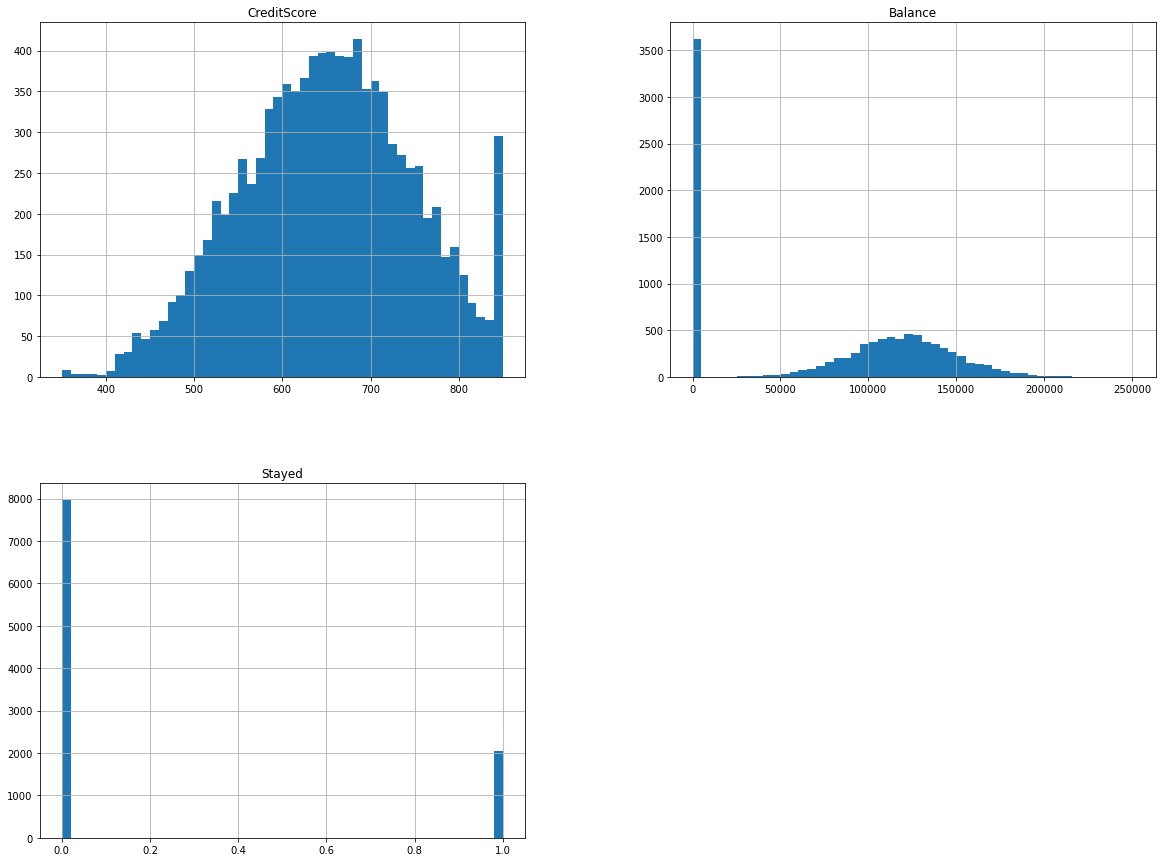

In [7]:
cm_df[["CreditScore", "Balance", "Stayed"]].hist(bins=50, figsize=(20,15)) 
plt.show()

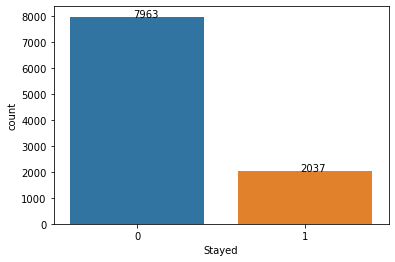

In [8]:
#Plotting the number of people who stayed and who left the company
ax = sns.countplot(x="Stayed", data=cm_df)
for p, label in zip(ax.patches, cm_df["Stayed"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.95))
#plt.show()

# Fitting the data to two models to get baseline metrics

In [31]:
def oneHot(X):
    #Applying OneHotEncoding
    OHEncoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    #getting a list of categorical columns
    c = (X.dtypes == "object")
    object_cols = list(c[c].index)

    print("Categorical Columns: ")
    print(object_cols)

    encoded_columns = pd.DataFrame(OHEncoder.fit_transform(X[object_cols]))
    encoded_columns.columns = OHEncoder.get_feature_names(object_cols)

    #putting back the indices
    encoded_columns.index = X.index

    #dropping the categorical columns
    X_train_naive = X.drop(object_cols, axis=1)
    X_encoded = pd.concat([X_train_naive, encoded_columns], axis=1)
    
    return X_encoded

In [33]:
# Create our  training and testing datasets.
X = cm_df.drop(columns = ["RowNumber", "CustomerId", "Surname", "Stayed"])
y = cm_df["Stayed"]

X = oneHot(X)
X.head()

Categorical Columns: 
['Geography', 'Gender']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0


In [34]:
#Separating out training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("The length of the training set is: {} ".format(len(X_train)))
print("The length of the test set is: {} ".format(len(X_test)))

The length of the training set is: 8000 
The length of the test set is: 2000 


In [35]:
#defining the models which will be fitted to the data.
logistic_regressor = LogisticRegression()
random_forest = RandomForestClassifier()

In [36]:
logistic_regressor.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
print("Logistic Regression Accuracy: {} ".format(logistic_regressor.score(X_test, y_test)))
print("Random Forest Classifier Accuracy: {} ".format(random_forest.score(X_test, y_test)))

Logistic Regression Accuracy: 0.8005 
Random Forest Classifier Accuracy: 0.866 


# Engineering features for better accuracy
Since we have accuracies of 80% and 86%, these will serve as the baseline for all our other model, and we will try to improve upon this accuracy

We will perform 3 main tasks:
1. Change the balance out both classes (those who stayed and those who left)
2. Make changes to the "Balance" column by interpolating values and possibly adding another column to it.
3. Perform hyperparameter tuning on both models to improve their performances.

In [37]:
#Balancing the dataset by sampling the number of people who left. We make sure we have an equal number of observations from both samples.
emps_who_stayed = cm_df[cm_df["Stayed"]==1]
no_emps_who_stayed= len(emps_who_stayed)

emps_who_left = cm_df[cm_df["Stayed"]==0].sample(n=no_emps_who_stayed)

balanced_df = pd.concat([emps_who_stayed, emps_who_left])

#shuffling the dataset
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
balanced_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Stayed
0,173,15651022,Yost,480,Germany,Male,44,10,129608.57,1,1,0,5472.70,1
1,881,15585362,Simmons,749,France,Female,60,6,0.00,1,1,0,17978.68,1
2,6757,15659567,Ch'iu,473,France,Female,39,9,117103.26,2,1,1,85937.52,1
3,182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
4,8675,15719426,Cole,529,France,Male,67,8,103101.56,2,1,1,154002.02,1


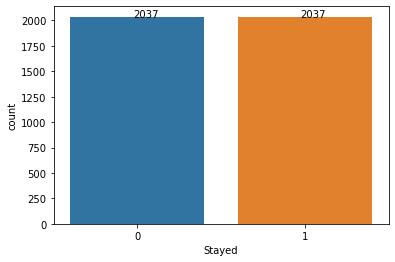

In [38]:
#Visualising both classes
ax = sns.countplot(x="Stayed", data=balanced_df)
for p, label in zip(ax.patches, balanced_df["Stayed"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
#plt.show()

In [53]:
# Defining our dependent and independent variables
X = balanced_df.drop(columns = ["RowNumber", "CustomerId", "Surname", "Stayed"])
y = balanced_df["Stayed"]

X = oneHot(X)

X.head()

Categorical Columns: 
['Geography', 'Gender']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,480,44,10,129608.57,1,1,0,5472.70,0.0,1.0,0.0,0.0,1.0
1,749,60,6,0.00,1,1,0,17978.68,1.0,0.0,0.0,1.0,0.0
2,473,39,9,117103.26,2,1,1,85937.52,1.0,0.0,0.0,1.0,0.0
3,510,65,2,0.00,2,1,1,48071.61,1.0,0.0,0.0,0.0,1.0
4,529,67,8,103101.56,2,1,1,154002.02,1.0,0.0,0.0,0.0,1.0


In [54]:
#Separating out training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

print("The length of the training set is: {} \n".format(len(X_train)))
print("The length of the test set is: {} \n".format(len(X_test)))

#defining the models which will be fitted to the data.
logistic_regressor = LogisticRegression()
random_forest = RandomForestClassifier()

#defining and fitting the models
logistic_regressor.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
print("Logistic Regression Accuracy: {} ".format(logistic_regressor.score(X_test, y_test)))
print("Random Forest Classifier Accuracy: {} ".format(random_forest.score(X_test, y_test)))

The length of the training set is: 3259 

The length of the test set is: 815 

Logistic Regression Accuracy: 0.6539877300613497 
Random Forest Classifier Accuracy: 0.7607361963190185 


#  Making changes to the "Balance" column

In [43]:
mean_balance = cm_df[cm_df["Balance"] > 0]["Balance"].mean()

def replaceval(y, mean_balance):
    if y == 0:
        y = mean_balance
    return y


In [61]:
# Defining our dependent and independent variables
X = cm_df.drop(columns = ["RowNumber", "CustomerId", "Surname", "Stayed"])
y = cm_df["Stayed"]

X = oneHot(X)

new_cols = X["Balance"].map(lambda x: replaceval(x, mean_balance))

X.drop(columns="Balance", inplace=True)
X["Balance"] = new_cols
X.head()

Categorical Columns: 
['Geography', 'Gender']


,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Balance
0,619,42,2,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0,119827.493793
1,608,41,1,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0,83807.860000
2,502,42,8,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0,159660.800000
3,699,39,1,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0,119827.493793
4,850,43,2,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0,125510.820000


In [ ]:
#Separating out training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

print("The length of the training set is: {} \n".format(len(X_train)))
print("The length of the test set is: {} \n".format(len(X_test)))

#defining the models which will be fitted to the data.
logistic_regressor = LogisticRegression()
random_forest = RandomForestClassifier()

#defining and fitting the models
logistic_regressor.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
print("Logistic Regression Accuracy: {} ".format(logistic_regressor.score(X_test, y_test)))
print("Random Forest Classifier Accuracy: {} ".format(random_forest.score(X_test, y_test)))

The length of the training set is: 8000 

The length of the test set is: 2000 

Logistic Regression Accuracy: 0.781 
Random Forest Classifier Accuracy: 0.8555 


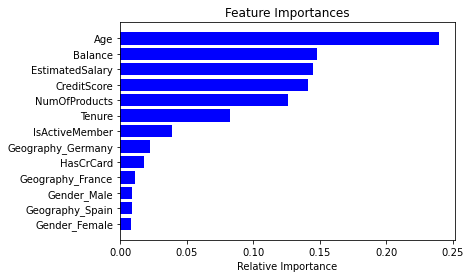

In [63]:
features = X_test.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# HyperParameter Tuning

In [68]:
# Balanced = 0.7828220858895706

rcf = RandomForestClassifier()
rcf.fit(X_train, y_train)
rcf.score(X_test, y_test)

0.866

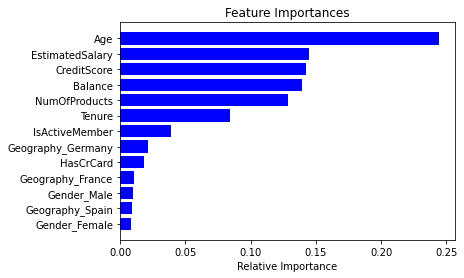

In [ ]:
features = X_test.columns
importances = rcf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [90]:
mean_balance = cm_df[cm_df["Balance"] > 0]["Balance"].mean()

def replaceval(y, mean_balance):
    if y == 0:
        y = mean_balance
    return y

new_cols = X_encoded["Balance"].map(lambda x: replaceval(x, mean_balance))



0       119827.493793
1        83807.860000
2       159660.800000
3       119827.493793
4       125510.820000
            ...      
9995    119827.493793
9996     57369.610000
9997    119827.493793
9998     75075.310000
9999    130142.790000
Name: Balance, Length: 10000, dtype: float64

In [91]:
X_encoded["Balance"].value_counts()

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64

In [ ]:
X.drop(columns="Balance_mean", inplace=)